In [1]:
learning_rate = 0.01
num_steps = 20
batch_size = 20
total_numbers = 291
display_step = 1000
examples_to_show = 10
import tensorflow as tf
from sklearn import preprocessing
# Network Parameters
num_hidden_1 = 64 # 1st layer num features
num_hidden_2 = 128
num_hidden_3 = 256
num_hidden_4 = 512# 2nd layer num features (the latent dim)
num_input = 12 
num_classes = 7

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])


weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'encoder_h4': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_4])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_4, num_hidden_3])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h4': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'classifier_h': tf.Variable(tf.random_normal([num_hidden_4, num_classes])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([num_hidden_3])),
    'encoder_b4': tf.Variable(tf.random_normal([num_hidden_4])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_3])),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b3': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b4': tf.Variable(tf.random_normal([num_input])),
    'classifier_b': tf.Variable(tf.random_normal([num_classes])),
}

In [2]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                   biases['encoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                   biases['encoder_b4']))
    
    return layer_4


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                   biases['decoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                   biases['decoder_b4']))
    return layer_4

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op

label_pred = tf.nn.softmax(tf.add(tf.matmul(encoder_op, weights['classifier_h']), biases['classifier_b']))
y_clipped = tf.clip_by_value(label_pred, 1e-10, 0.9999999)


# Targets (Labels) are the input data.
y_true = X
label_true = Y

# Define loss and optimizer, minimize the squared error
loss_autoencoder = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
cross_entropy_loss = -tf.reduce_mean(tf.reduce_sum(label_true * tf.log(y_clipped)
                         + (1 - label_true) * tf.log(1 - y_clipped), axis=1))
loss_total = loss_autoencoder+cross_entropy_loss

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_total)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [3]:
from numpy import genfromtxt
X_tr = genfromtxt('./NewDataForBiplab/DataKharif2017/Train_2017Kharif_NDVI.csv', delimiter=',')
X_te = genfromtxt('./NewDataForBiplab/DataKharif2017/Test_2017Kharif_NDVI.csv', delimiter=',')

In [4]:
X_tr = X_tr[1:,:]
X_te = X_te[1:,:]
print(X_tr.shape)
print(X_te.shape)

(434, 12)
(112, 12)


In [5]:
print(X_tr.max())
print(X_te.max())

7.01173833972025
7.20733769059501


In [6]:
import numpy as np
X_tr = np.array(X_tr)
X_te = np.array(X_te)
print(X_tr.shape)

(434, 12)


In [7]:
X_tr = preprocessing.scale(X_tr)
X_te = preprocessing.scale(X_te)

In [8]:
import pandas
colnames = ['Latitude', 'Longitude', 'CropType','SampleYear','ShowingPeriod'
           , 'HarvestingPeriod', 'Others', 'Index']
data1 = pandas.read_csv('./NewDataForBiplab/DataKharif2017/Train_FieldDataKharif2017.csv', names=colnames)
data2 = pandas.read_csv('./NewDataForBiplab/DataKharif2017/Test_FieldDataKharif2017.csv', names=colnames)

In [9]:
ctype1 = data1.CropType.tolist()
ctype2 = data2.CropType.tolist()
print(ctype1)

['CType', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'S

In [10]:
p = np.array(ctype1)
p1=  np.array(ctype2)
print(p.shape)
print(p1.shape)

(435,)
(113,)


In [11]:
lbl1 = ctype1
label = []
for i in range(1,435):
    if(lbl1[i] == "Paddy"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "PearlMillet"):
        label += [2]
    if(lbl1[i] == "PigeonPea"):
        label += [3]
    if(lbl1[i] == "Sorghum"):
        label += [4]
    if(lbl1[i] == "ForestNonCropland"):
        label += [5]
    if(lbl1[i] == "Habitation"):
        label += [6]
y_tr = np.array(label)

lbl1 = ctype2
label = []
for i in range(1,113):
    if(lbl1[i] == "Paddy"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "PearlMillet"):
        label += [2]
    if(lbl1[i] == "PigeonPea"):
        label += [3]
    if(lbl1[i] == "Sorghum"):
        label += [4]
    if(lbl1[i] == "ForestNonCropland"):
        label += [5]
    if(lbl1[i] == "Habitation"):
        label += [6]
y_te = np.array(label)

print(y_tr.shape)
print(y_te.shape)
print(y_te)

(434,)
(112,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6]


In [12]:
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
for i in range(0, y_te.shape[0]):
    if(label[i]==0):
        x1.append(X_te[i])
        l1.append([1,0,0,0,0,0,0])
    if(label[i]==1):
        x2.append(X_te[i])
        l2.append([0,1,0,0,0,0,0])
    if(label[i]==2):
        x3.append(X_te[i])
        l3.append([0,0,1,0,0,0,0])
    if(label[i]==3):
        x4.append(X_te[i])
        l4.append([0,0,0,1,0,0,0])
    if(label[i]==4):
        x5.append(X_te[i])
        l5.append([0,0,0,0,1,0,0])
    if(label[i]==5):
        x6.append(X_te[i])
        l6.append([0,0,0,0,0,1,0])
    if(label[i]==6):
        x7.append(X_te[i])
        l7.append([0,0,0,0,0,0,1])
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
x4=np.array(x4)
x5=np.array(x5)
x6=np.array(x6)
x7=np.array(x7)

l1=np.array(l1)
l2=np.array(l2)
l3=np.array(l3)
l4=np.array(l4)
l5=np.array(l5)
l6=np.array(l6)
l7=np.array(l7)

print(l7.shape)

(42, 7)


In [13]:
from sklearn.utils import shuffle
X_tr, y_tr = shuffle(X_tr, y_tr, random_state = 0)
X_te, y_te = shuffle(X_te, y_te, random_state = 0)

In [14]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(434, 12)
(112, 12)
(434,)
(112,)


In [15]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_te)
y_train = np_utils.to_categorical(y_tr)
print(y_train.shape)
print(y_test.shape)

(434, 7)
(112, 7)


/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(label_pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)
batch_size = 16
num_batch = 27

# Training
acc = []
for i in range(0,10000):
    k = 0 
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    avg_cost = 0
    for j in (0,num_batch):
        batch_x = X_tr[k:k+batch_size,:]
        batch_y = y_train[k:k+batch_size,:]
        k += batch_size

    # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss_total], feed_dict={X: batch_x, Y: batch_y})
        avg_cost += l / num_batch
    print("Epoch:", (i + 1), "cost =", "{:.8f}".format(avg_cost))
    if(i%100==0):
        acc.append(sess.run(accuracy, feed_dict={X: X_te, Y: y_test}))
        
acc = np.array(acc)

Epoch: 1 cost = 0.78679276
Epoch: 2 cost = 0.68922677
Epoch: 3 cost = 0.48044355
Epoch: 4 cost = 0.39842206
Epoch: 5 cost = 0.35594089
Epoch: 6 cost = 0.31150149
Epoch: 7 cost = 0.28157579
Epoch: 8 cost = 0.24815101
Epoch: 9 cost = 0.20869875
Epoch: 10 cost = 0.17738611
Epoch: 11 cost = 0.15014980
Epoch: 12 cost = 0.13071664
Epoch: 13 cost = 0.11771770
Epoch: 14 cost = 0.11376022
Epoch: 15 cost = 0.11147648
Epoch: 16 cost = 0.10966512
Epoch: 17 cost = 0.10808341
Epoch: 18 cost = 0.10663871
Epoch: 19 cost = 0.10527009
Epoch: 20 cost = 0.10393663
Epoch: 21 cost = 0.10263154
Epoch: 22 cost = 0.10138633
Epoch: 23 cost = 0.10024470
Epoch: 24 cost = 0.09921499
Epoch: 25 cost = 0.09827490
Epoch: 26 cost = 0.09740526
Epoch: 27 cost = 0.09659137
Epoch: 28 cost = 0.09581884
Epoch: 29 cost = 0.09507390
Epoch: 30 cost = 0.09434493
Epoch: 31 cost = 0.09362166
Epoch: 32 cost = 0.09289254
Epoch: 33 cost = 0.09214871
Epoch: 34 cost = 0.09139093
Epoch: 35 cost = 0.09061614
Epoch: 36 cost = 0.08984442
E

Epoch: 307 cost = 0.20309967
Epoch: 308 cost = 0.18657687
Epoch: 309 cost = 0.18739405
Epoch: 310 cost = 0.19512141
Epoch: 311 cost = 0.18220479
Epoch: 312 cost = 0.18542737
Epoch: 313 cost = 0.18121460
Epoch: 314 cost = 0.18914570
Epoch: 315 cost = 0.17872749
Epoch: 316 cost = 0.18501038
Epoch: 317 cost = 0.18250631
Epoch: 318 cost = 0.18597107
Epoch: 319 cost = 0.19840063
Epoch: 320 cost = 0.18188527
Epoch: 321 cost = 0.17835106
Epoch: 322 cost = 0.18316998
Epoch: 323 cost = 0.17818210
Epoch: 324 cost = 0.17775523
Epoch: 325 cost = 0.18672101
Epoch: 326 cost = 0.20185363
Epoch: 327 cost = 0.20034773
Epoch: 328 cost = 0.18879604
Epoch: 329 cost = 0.18092807
Epoch: 330 cost = 0.18243353
Epoch: 331 cost = 0.18581967
Epoch: 332 cost = 0.19701872
Epoch: 333 cost = 0.18329878
Epoch: 334 cost = 0.17812311
Epoch: 335 cost = 0.17891163
Epoch: 336 cost = 0.19132944
Epoch: 337 cost = 0.18589807
Epoch: 338 cost = 0.18531037
Epoch: 339 cost = 0.19069759
Epoch: 340 cost = 0.18582795
Epoch: 341 cos

Epoch: 610 cost = 0.17951209
Epoch: 611 cost = 0.18294652
Epoch: 612 cost = 0.17742301
Epoch: 613 cost = 0.18465718
Epoch: 614 cost = 0.19825211
Epoch: 615 cost = 0.18295480
Epoch: 616 cost = 0.18055885
Epoch: 617 cost = 0.17822157
Epoch: 618 cost = 0.17786774
Epoch: 619 cost = 0.19312277
Epoch: 620 cost = 0.18330195
Epoch: 621 cost = 0.20399087
Epoch: 622 cost = 0.17721387
Epoch: 623 cost = 0.17687840
Epoch: 624 cost = 0.17641541
Epoch: 625 cost = 0.17624927
Epoch: 626 cost = 0.17610596
Epoch: 627 cost = 0.17597702
Epoch: 628 cost = 0.17595311
Epoch: 629 cost = 0.17598746
Epoch: 630 cost = 0.17586942
Epoch: 631 cost = 0.17590280
Epoch: 632 cost = 0.17607886
Epoch: 633 cost = 0.17645307
Epoch: 634 cost = 0.17975733
Epoch: 635 cost = 0.17872158
Epoch: 636 cost = 0.22446994
Epoch: 637 cost = 0.18010556
Epoch: 638 cost = 0.20335877
Epoch: 639 cost = 0.18417550
Epoch: 640 cost = 0.19321675
Epoch: 641 cost = 0.17951082
Epoch: 642 cost = 0.18561538
Epoch: 643 cost = 0.18051976
Epoch: 644 cos

Epoch: 911 cost = 0.17293386
Epoch: 912 cost = 0.18652646
Epoch: 913 cost = 0.17705953
Epoch: 914 cost = 0.16853950
Epoch: 915 cost = 0.18229504
Epoch: 916 cost = 0.17457284
Epoch: 917 cost = 0.17617429
Epoch: 918 cost = 0.18151366
Epoch: 919 cost = 0.17081170
Epoch: 920 cost = 0.17464815
Epoch: 921 cost = 0.18029978
Epoch: 922 cost = 0.17152869
Epoch: 923 cost = 0.17479843
Epoch: 924 cost = 0.18080284
Epoch: 925 cost = 0.17082847
Epoch: 926 cost = 0.17581470
Epoch: 927 cost = 0.18268721
Epoch: 928 cost = 0.19263614
Epoch: 929 cost = 0.16963936
Epoch: 930 cost = 0.17638893
Epoch: 931 cost = 0.16912087
Epoch: 932 cost = 0.16940887
Epoch: 933 cost = 0.18205934
Epoch: 934 cost = 0.17478465
Epoch: 935 cost = 0.16700111
Epoch: 936 cost = 0.16693885
Epoch: 937 cost = 0.16952307
Epoch: 938 cost = 0.17256272
Epoch: 939 cost = 0.18367694
Epoch: 940 cost = 0.17059844
Epoch: 941 cost = 0.19025874
Epoch: 942 cost = 0.16879341
Epoch: 943 cost = 0.16702169
Epoch: 944 cost = 0.16796814
Epoch: 945 cos

Epoch: 1192 cost = 0.18849115
Epoch: 1193 cost = 0.16671486
Epoch: 1194 cost = 0.16730542
Epoch: 1195 cost = 0.16712673
Epoch: 1196 cost = 0.17165079
Epoch: 1197 cost = 0.17648716
Epoch: 1198 cost = 0.19326275
Epoch: 1199 cost = 0.16925437
Epoch: 1200 cost = 0.17301769
Epoch: 1201 cost = 0.18447735
Epoch: 1202 cost = 0.17418502
Epoch: 1203 cost = 0.16942691
Epoch: 1204 cost = 0.18332671
Epoch: 1205 cost = 0.16822543
Epoch: 1206 cost = 0.17469578
Epoch: 1207 cost = 0.17247354
Epoch: 1208 cost = 0.18598446
Epoch: 1209 cost = 0.16673439
Epoch: 1210 cost = 0.16741389
Epoch: 1211 cost = 0.16712807
Epoch: 1212 cost = 0.17159518
Epoch: 1213 cost = 0.17500991
Epoch: 1214 cost = 0.19320074
Epoch: 1215 cost = 0.16779997
Epoch: 1216 cost = 0.16778695
Epoch: 1217 cost = 0.17787464
Epoch: 1218 cost = 0.16698201
Epoch: 1219 cost = 0.16697871
Epoch: 1220 cost = 0.16702930
Epoch: 1221 cost = 0.16953795
Epoch: 1222 cost = 0.19276322
Epoch: 1223 cost = 0.17009546
Epoch: 1224 cost = 0.17426325
Epoch: 122

Epoch: 1474 cost = 0.16646379
Epoch: 1475 cost = 0.16692368
Epoch: 1476 cost = 0.16936913
Epoch: 1477 cost = 0.18639823
Epoch: 1478 cost = 0.19855718
Epoch: 1479 cost = 0.17336564
Epoch: 1480 cost = 0.18843664
Epoch: 1481 cost = 0.17463175
Epoch: 1482 cost = 0.18296637
Epoch: 1483 cost = 0.17577834
Epoch: 1484 cost = 0.17986725
Epoch: 1485 cost = 0.17635579
Epoch: 1486 cost = 0.17812558
Epoch: 1487 cost = 0.17656063
Epoch: 1488 cost = 0.17722265
Epoch: 1489 cost = 0.17656713
Epoch: 1490 cost = 0.17676917
Epoch: 1491 cost = 0.17651286
Epoch: 1492 cost = 0.17655551
Epoch: 1493 cost = 0.17644245
Epoch: 1494 cost = 0.17643588
Epoch: 1495 cost = 0.17637759
Epoch: 1496 cost = 0.17633018
Epoch: 1497 cost = 0.17620202
Epoch: 1498 cost = 0.17509225
Epoch: 1499 cost = 0.17540376
Epoch: 1500 cost = 0.18625119
Epoch: 1501 cost = 0.16896877
Epoch: 1502 cost = 0.17491986
Epoch: 1503 cost = 0.17018567
Epoch: 1504 cost = 0.18396952
Epoch: 1505 cost = 0.16934587
Epoch: 1506 cost = 0.17522715
Epoch: 150

Epoch: 1763 cost = 0.16692199
Epoch: 1764 cost = 0.16712180
Epoch: 1765 cost = 0.17315418
Epoch: 1766 cost = 0.18014322
Epoch: 1767 cost = 0.18939747
Epoch: 1768 cost = 0.17262396
Epoch: 1769 cost = 0.17658340
Epoch: 1770 cost = 0.18190147
Epoch: 1771 cost = 0.17095425
Epoch: 1772 cost = 0.17713792
Epoch: 1773 cost = 0.17592733
Epoch: 1774 cost = 0.17462843
Epoch: 1775 cost = 0.17894511
Epoch: 1776 cost = 0.17101557
Epoch: 1777 cost = 0.17558347
Epoch: 1778 cost = 0.17830282
Epoch: 1779 cost = 0.17067677
Epoch: 1780 cost = 0.17691050
Epoch: 1781 cost = 0.17644355
Epoch: 1782 cost = 0.17191933
Epoch: 1783 cost = 0.17876095
Epoch: 1784 cost = 0.17447217
Epoch: 1785 cost = 0.17090338
Epoch: 1786 cost = 0.18077566
Epoch: 1787 cost = 0.16952508
Epoch: 1788 cost = 0.17455123
Epoch: 1789 cost = 0.17743826
Epoch: 1790 cost = 0.17720032
Epoch: 1791 cost = 0.16978781
Epoch: 1792 cost = 0.17937199
Epoch: 1793 cost = 0.16931671
Epoch: 1794 cost = 0.17783664
Epoch: 1795 cost = 0.17229256
Epoch: 179

Epoch: 2037 cost = 0.17546886
Epoch: 2038 cost = 0.18533279
Epoch: 2039 cost = 0.16750005
Epoch: 2040 cost = 0.16879761
Epoch: 2041 cost = 0.17031116
Epoch: 2042 cost = 0.17593193
Epoch: 2043 cost = 0.18111770
Epoch: 2044 cost = 0.18309728
Epoch: 2045 cost = 0.16876935
Epoch: 2046 cost = 0.17198468
Epoch: 2047 cost = 0.16856425
Epoch: 2048 cost = 0.18147310
Epoch: 2049 cost = 0.17942203
Epoch: 2050 cost = 0.17169702
Epoch: 2051 cost = 0.18257872
Epoch: 2052 cost = 0.17184371
Epoch: 2053 cost = 0.17185894
Epoch: 2054 cost = 0.18290802
Epoch: 2055 cost = 0.16871715
Epoch: 2056 cost = 0.17151663
Epoch: 2057 cost = 0.17437441
Epoch: 2058 cost = 0.18448947
Epoch: 2059 cost = 0.16676478
Epoch: 2060 cost = 0.16670192
Epoch: 2061 cost = 0.16747020
Epoch: 2062 cost = 0.16730447
Epoch: 2063 cost = 0.16982217
Epoch: 2064 cost = 0.18208907
Epoch: 2065 cost = 0.18821990
Epoch: 2066 cost = 0.16698259
Epoch: 2067 cost = 0.16970590
Epoch: 2068 cost = 0.16831981
Epoch: 2069 cost = 0.18388946
Epoch: 207

Epoch: 2319 cost = 0.17339919
Epoch: 2320 cost = 0.18351275
Epoch: 2321 cost = 0.16738551
Epoch: 2322 cost = 0.17108495
Epoch: 2323 cost = 0.16793875
Epoch: 2324 cost = 0.18041420
Epoch: 2325 cost = 0.17953863
Epoch: 2326 cost = 0.17195236
Epoch: 2327 cost = 0.18068031
Epoch: 2328 cost = 0.17607426
Epoch: 2329 cost = 0.16848409
Epoch: 2330 cost = 0.17946881
Epoch: 2331 cost = 0.16737743
Epoch: 2332 cost = 0.17385174
Epoch: 2333 cost = 0.17386169
Epoch: 2334 cost = 0.18666831
Epoch: 2335 cost = 0.16654500
Epoch: 2336 cost = 0.16645363
Epoch: 2337 cost = 0.16650852
Epoch: 2338 cost = 0.16656953
Epoch: 2339 cost = 0.16680348
Epoch: 2340 cost = 0.16856565
Epoch: 2341 cost = 0.17997169
Epoch: 2342 cost = 0.19322051
Epoch: 2343 cost = 0.16725674
Epoch: 2344 cost = 0.16951316
Epoch: 2345 cost = 0.17923856
Epoch: 2346 cost = 0.18671335
Epoch: 2347 cost = 0.17219774
Epoch: 2348 cost = 0.16697988
Epoch: 2349 cost = 0.16847937
Epoch: 2350 cost = 0.18592678
Epoch: 2351 cost = 0.16853703
Epoch: 235

Epoch: 2604 cost = 0.17207716
Epoch: 2605 cost = 0.18022731
Epoch: 2606 cost = 0.16926568
Epoch: 2607 cost = 0.17484960
Epoch: 2608 cost = 0.17536098
Epoch: 2609 cost = 0.17927329
Epoch: 2610 cost = 0.16918683
Epoch: 2611 cost = 0.17472770
Epoch: 2612 cost = 0.16860457
Epoch: 2613 cost = 0.18138839
Epoch: 2614 cost = 0.16974261
Epoch: 2615 cost = 0.17793324
Epoch: 2616 cost = 0.17135182
Epoch: 2617 cost = 0.18257506
Epoch: 2618 cost = 0.16988912
Epoch: 2619 cost = 0.17374659
Epoch: 2620 cost = 0.17726213
Epoch: 2621 cost = 0.17933690
Epoch: 2622 cost = 0.16933394
Epoch: 2623 cost = 0.17780796
Epoch: 2624 cost = 0.17054776
Epoch: 2625 cost = 0.17925448
Epoch: 2626 cost = 0.16860210
Epoch: 2627 cost = 0.17649491
Epoch: 2628 cost = 0.16835315
Epoch: 2629 cost = 0.18055128
Epoch: 2630 cost = 0.17298465
Epoch: 2631 cost = 0.17893036
Epoch: 2632 cost = 0.17757844
Epoch: 2633 cost = 0.17102674
Epoch: 2634 cost = 0.17866673
Epoch: 2635 cost = 0.17232748
Epoch: 2636 cost = 0.17708634
Epoch: 263

Epoch: 2892 cost = 0.17789161
Epoch: 2893 cost = 0.17933270
Epoch: 2894 cost = 0.17235985
Epoch: 2895 cost = 0.17413553
Epoch: 2896 cost = 0.18072506
Epoch: 2897 cost = 0.17024725
Epoch: 2898 cost = 0.17308658
Epoch: 2899 cost = 0.18041798
Epoch: 2900 cost = 0.17112308
Epoch: 2901 cost = 0.17348471
Epoch: 2902 cost = 0.18146902
Epoch: 2903 cost = 0.16824388
Epoch: 2904 cost = 0.17321440
Epoch: 2905 cost = 0.17467301
Epoch: 2906 cost = 0.18301948
Epoch: 2907 cost = 0.16700549
Epoch: 2908 cost = 0.16923079
Epoch: 2909 cost = 0.16922068
Epoch: 2910 cost = 0.18426627
Epoch: 2911 cost = 0.16709092
Epoch: 2912 cost = 0.17137531
Epoch: 2913 cost = 0.17155422
Epoch: 2914 cost = 0.18980366
Epoch: 2915 cost = 0.16953454
Epoch: 2916 cost = 0.16757152
Epoch: 2917 cost = 0.17832031
Epoch: 2918 cost = 0.18125202
Epoch: 2919 cost = 0.17708063
Epoch: 2920 cost = 0.16859374
Epoch: 2921 cost = 0.18070912
Epoch: 2922 cost = 0.16829530
Epoch: 2923 cost = 0.17831839
Epoch: 2924 cost = 0.16882583
Epoch: 292

Epoch: 3191 cost = 0.17427829
Epoch: 3192 cost = 0.17819947
Epoch: 3193 cost = 0.17180860
Epoch: 3194 cost = 0.17487837
Epoch: 3195 cost = 0.17749936
Epoch: 3196 cost = 0.17225460
Epoch: 3197 cost = 0.17555571
Epoch: 3198 cost = 0.17683859
Epoch: 3199 cost = 0.17206509
Epoch: 3200 cost = 0.17629670
Epoch: 3201 cost = 0.17511590
Epoch: 3202 cost = 0.17375654
Epoch: 3203 cost = 0.17687701
Epoch: 3204 cost = 0.17433874
Epoch: 3205 cost = 0.17304699
Epoch: 3206 cost = 0.17739805
Epoch: 3207 cost = 0.17202635
Epoch: 3208 cost = 0.17546613
Epoch: 3209 cost = 0.17632391
Epoch: 3210 cost = 0.17358280
Epoch: 3211 cost = 0.17410654
Epoch: 3212 cost = 0.17682648
Epoch: 3213 cost = 0.17149346
Epoch: 3214 cost = 0.17582794
Epoch: 3215 cost = 0.17537651
Epoch: 3216 cost = 0.17390316
Epoch: 3217 cost = 0.17399187
Epoch: 3218 cost = 0.17641580
Epoch: 3219 cost = 0.17058659
Epoch: 3220 cost = 0.17676819
Epoch: 3221 cost = 0.17350080
Epoch: 3222 cost = 0.17615011
Epoch: 3223 cost = 0.17130496
Epoch: 322

Epoch: 3486 cost = 0.17451354
Epoch: 3487 cost = 0.18204279
Epoch: 3488 cost = 0.16667919
Epoch: 3489 cost = 0.16656073
Epoch: 3490 cost = 0.16654257
Epoch: 3491 cost = 0.16675556
Epoch: 3492 cost = 0.16751381
Epoch: 3493 cost = 0.17083522
Epoch: 3494 cost = 0.19017673
Epoch: 3495 cost = 0.17963809
Epoch: 3496 cost = 0.18015090
Epoch: 3497 cost = 0.17076652
Epoch: 3498 cost = 0.18249931
Epoch: 3499 cost = 0.17626375
Epoch: 3500 cost = 0.16822254
Epoch: 3501 cost = 0.18116032
Epoch: 3502 cost = 0.17085319
Epoch: 3503 cost = 0.18092025
Epoch: 3504 cost = 0.16879913
Epoch: 3505 cost = 0.17710179
Epoch: 3506 cost = 0.17362737
Epoch: 3507 cost = 0.18146275
Epoch: 3508 cost = 0.17231016
Epoch: 3509 cost = 0.17423038
Epoch: 3510 cost = 0.18090534
Epoch: 3511 cost = 0.16909129
Epoch: 3512 cost = 0.17494924
Epoch: 3513 cost = 0.17527858
Epoch: 3514 cost = 0.17945717
Epoch: 3515 cost = 0.17145604
Epoch: 3516 cost = 0.17659147
Epoch: 3517 cost = 0.17675757
Epoch: 3518 cost = 0.17241121
Epoch: 351

Epoch: 3768 cost = 0.17858817
Epoch: 3769 cost = 0.17221496
Epoch: 3770 cost = 0.17542911
Epoch: 3771 cost = 0.17951489
Epoch: 3772 cost = 0.16823987
Epoch: 3773 cost = 0.17478280
Epoch: 3774 cost = 0.17029184
Epoch: 3775 cost = 0.18387773
Epoch: 3776 cost = 0.16708215
Epoch: 3777 cost = 0.16990570
Epoch: 3778 cost = 0.16835732
Epoch: 3779 cost = 0.18230659
Epoch: 3780 cost = 0.17640830
Epoch: 3781 cost = 0.17285264
Epoch: 3782 cost = 0.18500463
Epoch: 3783 cost = 0.16930511
Epoch: 3784 cost = 0.16954926
Epoch: 3785 cost = 0.18192737
Epoch: 3786 cost = 0.16812539
Epoch: 3787 cost = 0.17681309
Epoch: 3788 cost = 0.16963905
Epoch: 3789 cost = 0.18493897
Epoch: 3790 cost = 0.17013314
Epoch: 3791 cost = 0.17298399
Epoch: 3792 cost = 0.18393006
Epoch: 3793 cost = 0.17098970
Epoch: 3794 cost = 0.16961920
Epoch: 3795 cost = 0.18310374
Epoch: 3796 cost = 0.16692811
Epoch: 3797 cost = 0.16928286
Epoch: 3798 cost = 0.17008340
Epoch: 3799 cost = 0.18662187
Epoch: 3800 cost = 0.16671224
Epoch: 380

Epoch: 4072 cost = 0.16893434
Epoch: 4073 cost = 0.17165749
Epoch: 4074 cost = 0.18397341
Epoch: 4075 cost = 0.17043027
Epoch: 4076 cost = 0.17262431
Epoch: 4077 cost = 0.18498967
Epoch: 4078 cost = 0.16659154
Epoch: 4079 cost = 0.16654889
Epoch: 4080 cost = 0.16684873
Epoch: 4081 cost = 0.16717525
Epoch: 4082 cost = 0.17276618
Epoch: 4083 cost = 0.16766761
Epoch: 4084 cost = 0.18406311
Epoch: 4085 cost = 0.18850769
Epoch: 4086 cost = 0.17550573
Epoch: 4087 cost = 0.17720909
Epoch: 4088 cost = 0.18061540
Epoch: 4089 cost = 0.17509954
Epoch: 4090 cost = 0.17632497
Epoch: 4091 cost = 0.17489311
Epoch: 4092 cost = 0.17678969
Epoch: 4093 cost = 0.17653864
Epoch: 4094 cost = 0.16988106
Epoch: 4095 cost = 0.17878223
Epoch: 4096 cost = 0.17064346
Epoch: 4097 cost = 0.17751878
Epoch: 4098 cost = 0.17531949
Epoch: 4099 cost = 0.17589540
Epoch: 4100 cost = 0.17512970
Epoch: 4101 cost = 0.17632303
Epoch: 4102 cost = 0.17495012
Epoch: 4103 cost = 0.17397791
Epoch: 4104 cost = 0.17772695
Epoch: 410

Epoch: 4355 cost = 0.16745909
Epoch: 4356 cost = 0.17116895
Epoch: 4357 cost = 0.17344566
Epoch: 4358 cost = 0.18822549
Epoch: 4359 cost = 0.17007039
Epoch: 4360 cost = 0.16770570
Epoch: 4361 cost = 0.17975460
Epoch: 4362 cost = 0.17855910
Epoch: 4363 cost = 0.17815155
Epoch: 4364 cost = 0.17014045
Epoch: 4365 cost = 0.18103465
Epoch: 4366 cost = 0.17089204
Epoch: 4367 cost = 0.17535398
Epoch: 4368 cost = 0.18103069
Epoch: 4369 cost = 0.17076767
Epoch: 4370 cost = 0.17314596
Epoch: 4371 cost = 0.18180941
Epoch: 4372 cost = 0.16873274
Epoch: 4373 cost = 0.17324630
Epoch: 4374 cost = 0.17806367
Epoch: 4375 cost = 0.17776235
Epoch: 4376 cost = 0.16961766
Epoch: 4377 cost = 0.17984607
Epoch: 4378 cost = 0.16775329
Epoch: 4379 cost = 0.17520381
Epoch: 4380 cost = 0.16699212
Epoch: 4381 cost = 0.16800219
Epoch: 4382 cost = 0.18137816
Epoch: 4383 cost = 0.17703344
Epoch: 4384 cost = 0.17898967
Epoch: 4385 cost = 0.17853319
Epoch: 4386 cost = 0.17363909
Epoch: 4387 cost = 0.17766790
Epoch: 438

Epoch: 4657 cost = 0.17351214
Epoch: 4658 cost = 0.16763429
Epoch: 4659 cost = 0.17970890
Epoch: 4660 cost = 0.18792654
Epoch: 4661 cost = 0.16958663
Epoch: 4662 cost = 0.16840511
Epoch: 4663 cost = 0.18280313
Epoch: 4664 cost = 0.16733849
Epoch: 4665 cost = 0.17469565
Epoch: 4666 cost = 0.16948961
Epoch: 4667 cost = 0.18803591
Epoch: 4668 cost = 0.17001503
Epoch: 4669 cost = 0.16836249
Epoch: 4670 cost = 0.18214490
Epoch: 4671 cost = 0.17493956
Epoch: 4672 cost = 0.17507179
Epoch: 4673 cost = 0.18485577
Epoch: 4674 cost = 0.16685656
Epoch: 4675 cost = 0.16822179
Epoch: 4676 cost = 0.16704345
Epoch: 4677 cost = 0.16999336
Epoch: 4678 cost = 0.18416142
Epoch: 4679 cost = 0.17847024
Epoch: 4680 cost = 0.16835914
Epoch: 4681 cost = 0.18205365
Epoch: 4682 cost = 0.17048768
Epoch: 4683 cost = 0.18083519
Epoch: 4684 cost = 0.17833961
Epoch: 4685 cost = 0.16751780
Epoch: 4686 cost = 0.17531862
Epoch: 4687 cost = 0.17163253
Epoch: 4688 cost = 0.18636155
Epoch: 4689 cost = 0.16676014
Epoch: 469

Epoch: 4932 cost = 0.17320053
Epoch: 4933 cost = 0.17539994
Epoch: 4934 cost = 0.17148352
Epoch: 4935 cost = 0.17777420
Epoch: 4936 cost = 0.17312895
Epoch: 4937 cost = 0.17332082
Epoch: 4938 cost = 0.16966259
Epoch: 4939 cost = 0.16907008
Epoch: 4940 cost = 0.17793764
Epoch: 4941 cost = 0.16949391
Epoch: 4942 cost = 0.17302559
Epoch: 4943 cost = 0.18916628
Epoch: 4944 cost = 0.17057631
Epoch: 4945 cost = 0.16829667
Epoch: 4946 cost = 0.17556350
Epoch: 4947 cost = 0.18632574
Epoch: 4948 cost = 0.16968345
Epoch: 4949 cost = 0.17318896
Epoch: 4950 cost = 0.18474355
Epoch: 4951 cost = 0.16675713
Epoch: 4952 cost = 0.16706452
Epoch: 4953 cost = 0.16926006
Epoch: 4954 cost = 0.17274834
Epoch: 4955 cost = 0.19035517
Epoch: 4956 cost = 0.16823907
Epoch: 4957 cost = 0.16855170
Epoch: 4958 cost = 0.18155487
Epoch: 4959 cost = 0.17469148
Epoch: 4960 cost = 0.18033916
Epoch: 4961 cost = 0.18092895
Epoch: 4962 cost = 0.16787174
Epoch: 4963 cost = 0.17444223
Epoch: 4964 cost = 0.16731216
Epoch: 496

Epoch: 5231 cost = 0.16683592
Epoch: 5232 cost = 0.16679860
Epoch: 5233 cost = 0.16700365
Epoch: 5234 cost = 0.17102015
Epoch: 5235 cost = 0.16842748
Epoch: 5236 cost = 0.19128588
Epoch: 5237 cost = 0.17920597
Epoch: 5238 cost = 0.18108351
Epoch: 5239 cost = 0.16761482
Epoch: 5240 cost = 0.17603525
Epoch: 5241 cost = 0.16699247
Epoch: 5242 cost = 0.16875141
Epoch: 5243 cost = 0.18762499
Epoch: 5244 cost = 0.16832167
Epoch: 5245 cost = 0.17691650
Epoch: 5246 cost = 0.17461830
Epoch: 5247 cost = 0.18673786
Epoch: 5248 cost = 0.16667808
Epoch: 5249 cost = 0.16715889
Epoch: 5250 cost = 0.16695000
Epoch: 5251 cost = 0.16986503
Epoch: 5252 cost = 0.17120604
Epoch: 5253 cost = 0.19456841
Epoch: 5254 cost = 0.16698624
Epoch: 5255 cost = 0.16675622
Epoch: 5256 cost = 0.16677401
Epoch: 5257 cost = 0.16841892
Epoch: 5258 cost = 0.16769854
Epoch: 5259 cost = 0.18498955
Epoch: 5260 cost = 0.18630552
Epoch: 5261 cost = 0.16770570
Epoch: 5262 cost = 0.18070127
Epoch: 5263 cost = 0.16706563
Epoch: 526

Epoch: 5505 cost = 0.17246818
Epoch: 5506 cost = 0.17597535
Epoch: 5507 cost = 0.17615459
Epoch: 5508 cost = 0.17250824
Epoch: 5509 cost = 0.17734020
Epoch: 5510 cost = 0.17425503
Epoch: 5511 cost = 0.17315615
Epoch: 5512 cost = 0.17870283
Epoch: 5513 cost = 0.17173103
Epoch: 5514 cost = 0.17417413
Epoch: 5515 cost = 0.17884199
Epoch: 5516 cost = 0.17097488
Epoch: 5517 cost = 0.17501978
Epoch: 5518 cost = 0.17813125
Epoch: 5519 cost = 0.17144135
Epoch: 5520 cost = 0.17604878
Epoch: 5521 cost = 0.17755514
Epoch: 5522 cost = 0.17046270
Epoch: 5523 cost = 0.17749785
Epoch: 5524 cost = 0.17454191
Epoch: 5525 cost = 0.17385124
Epoch: 5526 cost = 0.17864873
Epoch: 5527 cost = 0.17333404
Epoch: 5528 cost = 0.17206128
Epoch: 5529 cost = 0.18038570
Epoch: 5530 cost = 0.16975271
Epoch: 5531 cost = 0.17383903
Epoch: 5532 cost = 0.17817024
Epoch: 5533 cost = 0.17488238
Epoch: 5534 cost = 0.17182309
Epoch: 5535 cost = 0.18073757
Epoch: 5536 cost = 0.16874035
Epoch: 5537 cost = 0.17395335
Epoch: 553

Epoch: 5781 cost = 0.17571523
Epoch: 5782 cost = 0.16964186
Epoch: 5783 cost = 0.17637799
Epoch: 5784 cost = 0.16899409
Epoch: 5785 cost = 0.17614284
Epoch: 5786 cost = 0.17250694
Epoch: 5787 cost = 0.17921135
Epoch: 5788 cost = 0.16815043
Epoch: 5789 cost = 0.17626903
Epoch: 5790 cost = 0.17273109
Epoch: 5791 cost = 0.18175201
Epoch: 5792 cost = 0.16728650
Epoch: 5793 cost = 0.17172476
Epoch: 5794 cost = 0.17370306
Epoch: 5795 cost = 0.18472648
Epoch: 5796 cost = 0.16815986
Epoch: 5797 cost = 0.17439211
Epoch: 5798 cost = 0.17121031
Epoch: 5799 cost = 0.18029384
Epoch: 5800 cost = 0.17552613
Epoch: 5801 cost = 0.17565933
Epoch: 5802 cost = 0.17824266
Epoch: 5803 cost = 0.17482664
Epoch: 5804 cost = 0.17218734
Epoch: 5805 cost = 0.17741677
Epoch: 5806 cost = 0.17403579
Epoch: 5807 cost = 0.17300269
Epoch: 5808 cost = 0.17524904
Epoch: 5809 cost = 0.17577900
Epoch: 5810 cost = 0.17197638
Epoch: 5811 cost = 0.17636530
Epoch: 5812 cost = 0.17382079
Epoch: 5813 cost = 0.17360447
Epoch: 581

Epoch: 6058 cost = 0.16840556
Epoch: 6059 cost = 0.16997340
Epoch: 6060 cost = 0.18432673
Epoch: 6061 cost = 0.16851056
Epoch: 6062 cost = 0.17759585
Epoch: 6063 cost = 0.17653211
Epoch: 6064 cost = 0.18168831
Epoch: 6065 cost = 0.17104507
Epoch: 6066 cost = 0.17689967
Epoch: 6067 cost = 0.17820081
Epoch: 6068 cost = 0.17084698
Epoch: 6069 cost = 0.17891922
Epoch: 6070 cost = 0.17327061
Epoch: 6071 cost = 0.17395518
Epoch: 6072 cost = 0.18052607
Epoch: 6073 cost = 0.16992804
Epoch: 6074 cost = 0.17356521
Epoch: 6075 cost = 0.17919625
Epoch: 6076 cost = 0.17289061
Epoch: 6077 cost = 0.17321399
Epoch: 6078 cost = 0.18123914
Epoch: 6079 cost = 0.16775531
Epoch: 6080 cost = 0.17224649
Epoch: 6081 cost = 0.17024739
Epoch: 6082 cost = 0.18501626
Epoch: 6083 cost = 0.16888494
Epoch: 6084 cost = 0.17214012
Epoch: 6085 cost = 0.18030037
Epoch: 6086 cost = 0.17742689
Epoch: 6087 cost = 0.16722627
Epoch: 6088 cost = 0.17216815
Epoch: 6089 cost = 0.17863476
Epoch: 6090 cost = 0.18112609
Epoch: 609

Epoch: 6358 cost = 0.16761006
Epoch: 6359 cost = 0.17555463
Epoch: 6360 cost = 0.16723017
Epoch: 6361 cost = 0.17278615
Epoch: 6362 cost = 0.19035755
Epoch: 6363 cost = 0.16697673
Epoch: 6364 cost = 0.16778778
Epoch: 6365 cost = 0.17233672
Epoch: 6366 cost = 0.18421627
Epoch: 6367 cost = 0.17794795
Epoch: 6368 cost = 0.16968180
Epoch: 6369 cost = 0.18378062
Epoch: 6370 cost = 0.16882719
Epoch: 6371 cost = 0.17493034
Epoch: 6372 cost = 0.17880294
Epoch: 6373 cost = 0.17931531
Epoch: 6374 cost = 0.16699576
Epoch: 6375 cost = 0.16913530
Epoch: 6376 cost = 0.17837889
Epoch: 6377 cost = 0.17639609
Epoch: 6378 cost = 0.18089287
Epoch: 6379 cost = 0.17002580
Epoch: 6380 cost = 0.17674019
Epoch: 6381 cost = 0.17781498
Epoch: 6382 cost = 0.17220222
Epoch: 6383 cost = 0.17841290
Epoch: 6384 cost = 0.17616490
Epoch: 6385 cost = 0.16895973
Epoch: 6386 cost = 0.17894463
Epoch: 6387 cost = 0.16744780
Epoch: 6388 cost = 0.17399822
Epoch: 6389 cost = 0.17224712
Epoch: 6390 cost = 0.18579369
Epoch: 639

Epoch: 6640 cost = 0.18087043
Epoch: 6641 cost = 0.17410323
Epoch: 6642 cost = 0.17542779
Epoch: 6643 cost = 0.18072029
Epoch: 6644 cost = 0.16766951
Epoch: 6645 cost = 0.17308903
Epoch: 6646 cost = 0.16714029
Epoch: 6647 cost = 0.17129813
Epoch: 6648 cost = 0.18646768
Epoch: 6649 cost = 0.16950896
Epoch: 6650 cost = 0.17039647
Epoch: 6651 cost = 0.18473551
Epoch: 6652 cost = 0.16727265
Epoch: 6653 cost = 0.17156591
Epoch: 6654 cost = 0.16841629
Epoch: 6655 cost = 0.18402054
Epoch: 6656 cost = 0.17961237
Epoch: 6657 cost = 0.16942456
Epoch: 6658 cost = 0.18231565
Epoch: 6659 cost = 0.16998989
Epoch: 6660 cost = 0.17912897
Epoch: 6661 cost = 0.17176112
Epoch: 6662 cost = 0.18009065
Epoch: 6663 cost = 0.17453496
Epoch: 6664 cost = 0.17074197
Epoch: 6665 cost = 0.18207517
Epoch: 6666 cost = 0.16759940
Epoch: 6667 cost = 0.17232117
Epoch: 6668 cost = 0.16855932
Epoch: 6669 cost = 0.18217311
Epoch: 6670 cost = 0.17679868
Epoch: 6671 cost = 0.16775933
Epoch: 6672 cost = 0.17762450
Epoch: 667

Epoch: 6933 cost = 0.17405626
Epoch: 6934 cost = 0.17967855
Epoch: 6935 cost = 0.16979214
Epoch: 6936 cost = 0.17481711
Epoch: 6937 cost = 0.17749202
Epoch: 6938 cost = 0.17406615
Epoch: 6939 cost = 0.17458507
Epoch: 6940 cost = 0.17928586
Epoch: 6941 cost = 0.16885568
Epoch: 6942 cost = 0.17509562
Epoch: 6943 cost = 0.17341311
Epoch: 6944 cost = 0.18080099
Epoch: 6945 cost = 0.16953924
Epoch: 6946 cost = 0.17548796
Epoch: 6947 cost = 0.17515969
Epoch: 6948 cost = 0.17777289
Epoch: 6949 cost = 0.17423236
Epoch: 6950 cost = 0.17494751
Epoch: 6951 cost = 0.17712746
Epoch: 6952 cost = 0.17312825
Epoch: 6953 cost = 0.17570554
Epoch: 6954 cost = 0.17625244
Epoch: 6955 cost = 0.17274423
Epoch: 6956 cost = 0.17686734
Epoch: 6957 cost = 0.17459594
Epoch: 6958 cost = 0.17327798
Epoch: 6959 cost = 0.17807523
Epoch: 6960 cost = 0.17237626
Epoch: 6961 cost = 0.17425912
Epoch: 6962 cost = 0.17844044
Epoch: 6963 cost = 0.17107424
Epoch: 6964 cost = 0.17525478
Epoch: 6965 cost = 0.17741198
Epoch: 696

Epoch: 7234 cost = 0.16887261
Epoch: 7235 cost = 0.17422144
Epoch: 7236 cost = 0.17497767
Epoch: 7237 cost = 0.17987882
Epoch: 7238 cost = 0.16940399
Epoch: 7239 cost = 0.17639054
Epoch: 7240 cost = 0.17273513
Epoch: 7241 cost = 0.17979668
Epoch: 7242 cost = 0.17309641
Epoch: 7243 cost = 0.17343071
Epoch: 7244 cost = 0.18004623
Epoch: 7245 cost = 0.17036303
Epoch: 7246 cost = 0.17440148
Epoch: 7247 cost = 0.17791440
Epoch: 7248 cost = 0.17367731
Epoch: 7249 cost = 0.17434398
Epoch: 7250 cost = 0.17909542
Epoch: 7251 cost = 0.16977110
Epoch: 7252 cost = 0.17525241
Epoch: 7253 cost = 0.17546295
Epoch: 7254 cost = 0.17671920
Epoch: 7255 cost = 0.17362035
Epoch: 7256 cost = 0.17730474
Epoch: 7257 cost = 0.17323726
Epoch: 7258 cost = 0.17461746
Epoch: 7259 cost = 0.17802890
Epoch: 7260 cost = 0.17072225
Epoch: 7261 cost = 0.17579665
Epoch: 7262 cost = 0.17560443
Epoch: 7263 cost = 0.17439830
Epoch: 7264 cost = 0.17606037
Epoch: 7265 cost = 0.17586948
Epoch: 7266 cost = 0.17207648
Epoch: 726

Epoch: 7539 cost = 0.16975576
Epoch: 7540 cost = 0.17733013
Epoch: 7541 cost = 0.17438435
Epoch: 7542 cost = 0.17718896
Epoch: 7543 cost = 0.17615807
Epoch: 7544 cost = 0.17374781
Epoch: 7545 cost = 0.17674739
Epoch: 7546 cost = 0.17504156
Epoch: 7547 cost = 0.17384199
Epoch: 7548 cost = 0.17711699
Epoch: 7549 cost = 0.17362888
Epoch: 7550 cost = 0.17447512
Epoch: 7551 cost = 0.17741134
Epoch: 7552 cost = 0.17222489
Epoch: 7553 cost = 0.17553871
Epoch: 7554 cost = 0.17675118
Epoch: 7555 cost = 0.17203563
Epoch: 7556 cost = 0.17679915
Epoch: 7557 cost = 0.17526510
Epoch: 7558 cost = 0.17248313
Epoch: 7559 cost = 0.17830943
Epoch: 7560 cost = 0.17293123
Epoch: 7561 cost = 0.17330251
Epoch: 7562 cost = 0.17940412
Epoch: 7563 cost = 0.17066893
Epoch: 7564 cost = 0.17416554
Epoch: 7565 cost = 0.17860540
Epoch: 7566 cost = 0.17202427
Epoch: 7567 cost = 0.17456888
Epoch: 7568 cost = 0.17937410
Epoch: 7569 cost = 0.16928435
Epoch: 7570 cost = 0.17523282
Epoch: 7571 cost = 0.17525143
Epoch: 757

Epoch: 7842 cost = 0.17393119
Epoch: 7843 cost = 0.17865255
Epoch: 7844 cost = 0.17230188
Epoch: 7845 cost = 0.17410352
Epoch: 7846 cost = 0.17974022
Epoch: 7847 cost = 0.16916320
Epoch: 7848 cost = 0.17453497
Epoch: 7849 cost = 0.17532799
Epoch: 7850 cost = 0.17875448
Epoch: 7851 cost = 0.17083078
Epoch: 7852 cost = 0.17754547
Epoch: 7853 cost = 0.17344992
Epoch: 7854 cost = 0.17540071
Epoch: 7855 cost = 0.17824154
Epoch: 7856 cost = 0.17101331
Epoch: 7857 cost = 0.17567766
Epoch: 7858 cost = 0.17681687
Epoch: 7859 cost = 0.17283567
Epoch: 7860 cost = 0.17623169
Epoch: 7861 cost = 0.17673931
Epoch: 7862 cost = 0.17089401
Epoch: 7863 cost = 0.17746132
Epoch: 7864 cost = 0.17350359
Epoch: 7865 cost = 0.17496482
Epoch: 7866 cost = 0.17751720
Epoch: 7867 cost = 0.17325145
Epoch: 7868 cost = 0.17395966
Epoch: 7869 cost = 0.17819719
Epoch: 7870 cost = 0.17163296
Epoch: 7871 cost = 0.17476607
Epoch: 7872 cost = 0.17769619
Epoch: 7873 cost = 0.17175172
Epoch: 7874 cost = 0.17558508
Epoch: 787

Epoch: 8129 cost = 0.17736908
Epoch: 8130 cost = 0.17513197
Epoch: 8131 cost = 0.17152094
Epoch: 8132 cost = 0.16669566
Epoch: 8133 cost = 0.16699109
Epoch: 8134 cost = 0.16804446
Epoch: 8135 cost = 0.17000967
Epoch: 8136 cost = 0.16855969
Epoch: 8137 cost = 0.16758375
Epoch: 8138 cost = 0.17637789
Epoch: 8139 cost = 0.17253611
Epoch: 8140 cost = 0.19507766
Epoch: 8141 cost = 0.17066669
Epoch: 8142 cost = 0.17018856
Epoch: 8143 cost = 0.18490738
Epoch: 8144 cost = 0.16886441
Epoch: 8145 cost = 0.17184248
Epoch: 8146 cost = 0.16902546
Epoch: 8147 cost = 0.17949602
Epoch: 8148 cost = 0.18736227
Epoch: 8149 cost = 0.16763836
Epoch: 8150 cost = 0.17237310
Epoch: 8151 cost = 0.17255340
Epoch: 8152 cost = 0.18956099
Epoch: 8153 cost = 0.16724114
Epoch: 8154 cost = 0.16740772
Epoch: 8155 cost = 0.17125962
Epoch: 8156 cost = 0.17447283
Epoch: 8157 cost = 0.19071947
Epoch: 8158 cost = 0.16686256
Epoch: 8159 cost = 0.16713562
Epoch: 8160 cost = 0.16924551
Epoch: 8161 cost = 0.17509781
Epoch: 816

Epoch: 8412 cost = 0.17462594
Epoch: 8413 cost = 0.17562131
Epoch: 8414 cost = 0.17581503
Epoch: 8415 cost = 0.17258237
Epoch: 8416 cost = 0.17664680
Epoch: 8417 cost = 0.17354593
Epoch: 8418 cost = 0.17462408
Epoch: 8419 cost = 0.17674100
Epoch: 8420 cost = 0.17301036
Epoch: 8421 cost = 0.17451056
Epoch: 8422 cost = 0.17679516
Epoch: 8423 cost = 0.17212173
Epoch: 8424 cost = 0.17516022
Epoch: 8425 cost = 0.17609329
Epoch: 8426 cost = 0.17280960
Epoch: 8427 cost = 0.17525251
Epoch: 8428 cost = 0.17609604
Epoch: 8429 cost = 0.17196345
Epoch: 8430 cost = 0.17561148
Epoch: 8431 cost = 0.17521939
Epoch: 8432 cost = 0.17323455
Epoch: 8433 cost = 0.17526645
Epoch: 8434 cost = 0.17574638
Epoch: 8435 cost = 0.17147341
Epoch: 8436 cost = 0.17572467
Epoch: 8437 cost = 0.17417814
Epoch: 8438 cost = 0.17469977
Epoch: 8439 cost = 0.17423860
Epoch: 8440 cost = 0.17571628
Epoch: 8441 cost = 0.16995188
Epoch: 8442 cost = 0.17601797
Epoch: 8443 cost = 0.16973754
Epoch: 8444 cost = 0.17833476
Epoch: 844

Epoch: 8699 cost = 0.16949454
Epoch: 8700 cost = 0.18342238
Epoch: 8701 cost = 0.16696375
Epoch: 8702 cost = 0.17000001
Epoch: 8703 cost = 0.17104531
Epoch: 8704 cost = 0.18850667
Epoch: 8705 cost = 0.16807503
Epoch: 8706 cost = 0.16889838
Epoch: 8707 cost = 0.18120643
Epoch: 8708 cost = 0.17356201
Epoch: 8709 cost = 0.18053433
Epoch: 8710 cost = 0.18037360
Epoch: 8711 cost = 0.16678650
Epoch: 8712 cost = 0.16679108
Epoch: 8713 cost = 0.16805052
Epoch: 8714 cost = 0.17086185
Epoch: 8715 cost = 0.18714303
Epoch: 8716 cost = 0.17171200
Epoch: 8717 cost = 0.17197167
Epoch: 8718 cost = 0.18814219
Epoch: 8719 cost = 0.16870765
Epoch: 8720 cost = 0.16697283
Epoch: 8721 cost = 0.16872489
Epoch: 8722 cost = 0.18383238
Epoch: 8723 cost = 0.16802984
Epoch: 8724 cost = 0.17976071
Epoch: 8725 cost = 0.16799853
Epoch: 8726 cost = 0.18165327
Epoch: 8727 cost = 0.17232993
Epoch: 8728 cost = 0.18348200
Epoch: 8729 cost = 0.17395655
Epoch: 8730 cost = 0.16864250
Epoch: 8731 cost = 0.18159799
Epoch: 873

Epoch: 8999 cost = 0.17417198
Epoch: 9000 cost = 0.17984076
Epoch: 9001 cost = 0.17180735
Epoch: 9002 cost = 0.17223467
Epoch: 9003 cost = 0.18098375
Epoch: 9004 cost = 0.16925734
Epoch: 9005 cost = 0.17345116
Epoch: 9006 cost = 0.17797627
Epoch: 9007 cost = 0.17637129
Epoch: 9008 cost = 0.17041923
Epoch: 9009 cost = 0.18029101
Epoch: 9010 cost = 0.16834644
Epoch: 9011 cost = 0.17519089
Epoch: 9012 cost = 0.17073028
Epoch: 9013 cost = 0.18409530
Epoch: 9014 cost = 0.16732622
Epoch: 9015 cost = 0.17088659
Epoch: 9016 cost = 0.16728535
Epoch: 9017 cost = 0.17319135
Epoch: 9018 cost = 0.18805912
Epoch: 9019 cost = 0.16663173
Epoch: 9020 cost = 0.16691364
Epoch: 9021 cost = 0.16705845
Epoch: 9022 cost = 0.17136865
Epoch: 9023 cost = 0.16834259
Epoch: 9024 cost = 0.19135354
Epoch: 9025 cost = 0.17969422
Epoch: 9026 cost = 0.18072262
Epoch: 9027 cost = 0.16840898
Epoch: 9028 cost = 0.17920593
Epoch: 9029 cost = 0.17026359
Epoch: 9030 cost = 0.18422724
Epoch: 9031 cost = 0.16898690
Epoch: 903

Epoch: 9290 cost = 0.17377910
Epoch: 9291 cost = 0.17204542
Epoch: 9292 cost = 0.18577526
Epoch: 9293 cost = 0.16745245
Epoch: 9294 cost = 0.16985790
Epoch: 9295 cost = 0.17248264
Epoch: 9296 cost = 0.18605664
Epoch: 9297 cost = 0.16686111
Epoch: 9298 cost = 0.16859793
Epoch: 9299 cost = 0.16696806
Epoch: 9300 cost = 0.16718327
Epoch: 9301 cost = 0.17300474
Epoch: 9302 cost = 0.18908784
Epoch: 9303 cost = 0.17564985
Epoch: 9304 cost = 0.16698095
Epoch: 9305 cost = 0.16714729
Epoch: 9306 cost = 0.17222582
Epoch: 9307 cost = 0.19229304
Epoch: 9308 cost = 0.16647224
Epoch: 9309 cost = 0.16628228
Epoch: 9310 cost = 0.16630380
Epoch: 9311 cost = 0.16627682
Epoch: 9312 cost = 0.16638173
Epoch: 9313 cost = 0.16631392
Epoch: 9314 cost = 0.16660454
Epoch: 9315 cost = 0.16623952
Epoch: 9316 cost = 0.16634353
Epoch: 9317 cost = 0.16655074
Epoch: 9318 cost = 0.16694311
Epoch: 9319 cost = 0.16914669
Epoch: 9320 cost = 0.19764046
Epoch: 9321 cost = 0.18659387
Epoch: 9322 cost = 0.18433090
Epoch: 932

Epoch: 9593 cost = 0.17595600
Epoch: 9594 cost = 0.17670225
Epoch: 9595 cost = 0.17317146
Epoch: 9596 cost = 0.17653054
Epoch: 9597 cost = 0.17680546
Epoch: 9598 cost = 0.17042398
Epoch: 9599 cost = 0.17805295
Epoch: 9600 cost = 0.17276301
Epoch: 9601 cost = 0.17553246
Epoch: 9602 cost = 0.17772932
Epoch: 9603 cost = 0.17286668
Epoch: 9604 cost = 0.17467059
Epoch: 9605 cost = 0.17826405
Epoch: 9606 cost = 0.17144941
Epoch: 9607 cost = 0.17522267
Epoch: 9608 cost = 0.17772205
Epoch: 9609 cost = 0.17157892
Epoch: 9610 cost = 0.17621726
Epoch: 9611 cost = 0.17687141
Epoch: 9612 cost = 0.17125207
Epoch: 9613 cost = 0.17774522
Epoch: 9614 cost = 0.17451679
Epoch: 9615 cost = 0.17266384
Epoch: 9616 cost = 0.17939520
Epoch: 9617 cost = 0.17202647
Epoch: 9618 cost = 0.17276971
Epoch: 9619 cost = 0.18042846
Epoch: 9620 cost = 0.16991454
Epoch: 9621 cost = 0.17366025
Epoch: 9622 cost = 0.17888873
Epoch: 9623 cost = 0.17335771
Epoch: 9624 cost = 0.17299602
Epoch: 9625 cost = 0.18110216
Epoch: 962

Epoch: 9894 cost = 0.18142194
Epoch: 9895 cost = 0.18810543
Epoch: 9896 cost = 0.16894516
Epoch: 9897 cost = 0.16785640
Epoch: 9898 cost = 0.17908428
Epoch: 9899 cost = 0.17271869
Epoch: 9900 cost = 0.18615238
Epoch: 9901 cost = 0.17217720
Epoch: 9902 cost = 0.16695343
Epoch: 9903 cost = 0.16761985
Epoch: 9904 cost = 0.17895719
Epoch: 9905 cost = 0.17780245
Epoch: 9906 cost = 0.18309769
Epoch: 9907 cost = 0.16759663
Epoch: 9908 cost = 0.17349840
Epoch: 9909 cost = 0.16786320
Epoch: 9910 cost = 0.18059029
Epoch: 9911 cost = 0.18132336
Epoch: 9912 cost = 0.16853811
Epoch: 9913 cost = 0.17791477
Epoch: 9914 cost = 0.17127107
Epoch: 9915 cost = 0.18425937
Epoch: 9916 cost = 0.16747852
Epoch: 9917 cost = 0.17184000
Epoch: 9918 cost = 0.16814370
Epoch: 9919 cost = 0.18193804
Epoch: 9920 cost = 0.17835120
Epoch: 9921 cost = 0.16979871
Epoch: 9922 cost = 0.18245049
Epoch: 9923 cost = 0.16884082
Epoch: 9924 cost = 0.17661500
Epoch: 9925 cost = 0.17434853
Epoch: 9926 cost = 0.18257874
Epoch: 992

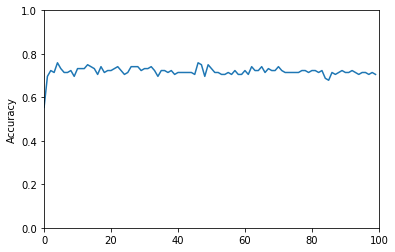

In [20]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.ylabel('Accuracy')
plt.axis([0, 100, 0, 1])
plt.show()

In [21]:
print(acc.max())
print(acc.argmax(axis=0))

0.7589286
4


In [17]:
print(y_test.shape)

(112, 7)


In [23]:
# on 1000 epochcura
print(sess.run(accuracy, feed_dict={X: X_te, Y: y_test}))

0.75000006


In [31]:
res1=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x1, Y: l1}))
res2=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x2, Y: l2}))
res3=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x3, Y: l3}))
res4=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x4, Y: l4}))
res5=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x5, Y: l5}))
res6=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x6, Y: l6}))
res7=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x7, Y: l7}))
print(res6)

[5 5 5 1 5 5 1]


In [32]:
confusion=[]
x1=np.sum(np.equal(res1, 0))
x2=np.sum(np.equal(res1, 1))
x3=np.sum(np.equal(res1, 2))
x4=np.sum(np.equal(res1, 3))
x5=np.sum(np.equal(res1, 4))
x6=np.sum(np.equal(res1, 5))
x7=np.sum(np.equal(res1, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res2, 0))
x2=np.sum(np.equal(res2, 1))
x3=np.sum(np.equal(res2, 2))
x4=np.sum(np.equal(res2, 3))
x5=np.sum(np.equal(res2, 4))
x6=np.sum(np.equal(res2, 5))
x7=np.sum(np.equal(res2, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res3, 0))
x2=np.sum(np.equal(res3, 1))
x3=np.sum(np.equal(res3, 2))
x4=np.sum(np.equal(res3, 3))
x5=np.sum(np.equal(res3, 4))
x6=np.sum(np.equal(res3, 5))
x7=np.sum(np.equal(res3, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res4, 0))
x2=np.sum(np.equal(res4, 1))
x3=np.sum(np.equal(res4, 2))
x4=np.sum(np.equal(res4, 3))
x5=np.sum(np.equal(res4, 4))
x6=np.sum(np.equal(res4, 5))
x7=np.sum(np.equal(res4, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res5, 0))
x2=np.sum(np.equal(res5, 1))
x3=np.sum(np.equal(res5, 2))
x4=np.sum(np.equal(res5, 3))
x5=np.sum(np.equal(res5, 4))
x6=np.sum(np.equal(res5, 5))
x7=np.sum(np.equal(res5, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res6, 0))
x2=np.sum(np.equal(res6, 1))
x3=np.sum(np.equal(res6, 2))
x4=np.sum(np.equal(res6, 3))
x5=np.sum(np.equal(res6, 4))
x6=np.sum(np.equal(res6, 5))
x7=np.sum(np.equal(res6, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res7, 0))
x2=np.sum(np.equal(res7, 1))
x3=np.sum(np.equal(res7, 2))
x4=np.sum(np.equal(res7, 3))
x5=np.sum(np.equal(res7, 4))
x6=np.sum(np.equal(res7, 5))
x7=np.sum(np.equal(res7, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

confusion=np.array(confusion)
print(confusion)

[[ 5  4  3  0  1  0  0]
 [ 2 31  0  0  0  1  1]
 [ 0  1  5  0  0  0  1]
 [ 0  2  0  0  0  0  0]
 [ 0  1  3  0  0  0  2]
 [ 0  2  0  0  0  5  0]
 [ 0  0  1  0  0  1 40]]


In [24]:
#SVM Classifier
from sklearn.svm import SVC  
from sklearn.metrics import cohen_kappa_score, confusion_matrix
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_tr, y_tr)  

y_pred = svclassifier.predict(X_te)  

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, y_pred)
print(accuracy)

0.8035714285714286


In [17]:
print(confusion_matrix(y_te, y_pred))
print(cohen_kappa_score(y_te, y_pred))

[[ 8  5  0  0  0  0  0]
 [ 0 35  0  0  0  0  0]
 [ 3  2  0  0  0  0  2]
 [ 0  2  0  0  0  0  0]
 [ 2  2  0  0  0  0  2]
 [ 0  6  0  0  0  1  0]
 [ 1  1  0  0  0  0 40]]
0.6375404530744336


In [2]:
import numpy as np
a = [0,1,0]
b = [6,5,6]
a=np.array(a)
b=np.array(b)
print(np.dot(a,b))

5
